<a href="https://colab.research.google.com/github/williamvalenciaK/SQLServerPIT/blob/main/Clases/2_Sesi%C3%B3n_2_TRANSACCIONES_T_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ 2.- TRANSACCIONES - T-SQL</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ ¿Qué es una Transacción T-SQL?</font>**

</td>
</tr>
</table>

Las transacciones en una base de datos son un conjunto de operaciones que se deben realizar de manera atómica, es decir, todas las operaciones deben completarse satisfactoriamente o, en caso de que alguna falle, todas deben revertirse.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ CARACTERÍSTICAS DE LAS TRANSACCIONES - PROPIEDADES ACID</font>**

</td>
</tr>
</table>

A: Atomicidad
C: Consistencia
A: Aislamiento
D: Durbilidad

>* **Atomicidad (Atomicity)**: Todas las operaciones de una transacción se ejecutan por completo o no se ejecuta ninguna. Si alguna de las operaciones falla, la transacción se revierte y se deshacen todos los cambios realizados.
>* **Consistencia (Consistency)**: Después de que una transacción se completa correctamente, la base de datos pasa de un estado consistente a otro estado consistente. Esto significa que se respetan todas las restricciones y reglas de la base de datos.
>* **Aislamiento (Isolation)**: Cada transacción se ejecuta de manera independiente, sin que los cambios realizados por una transacción afecten a otras transacciones concurrentes. Esto se logra mediante diferentes niveles de aislamiento.
>* **Durabilidad (Durability)**: Una vez que una transacción se ha completado satisfactoriamente, los cambios realizados en la base de datos se vuelven permanentes y persisten incluso si ocurre un fallo en el sistema.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Instrucciones de control de transacciones</font>**

</td>
</tr>
</table>

>* BEGIN TRANSACTION
>* COMMIT TRANSACTION
>* ROLLBACK TRANSACTION
>* SAVE TRANSACTION

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Control de errores</font>**

</td>
</tr>
</table>



```
BEGIN TRY
    { sql_statement | statement_block }
END TRY
BEGIN CATCH
    [ { sql_statement | statement_block } ]
END CATCH
[ ; ]
```



<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ Creación de la tabla de errores </font>**

</td>
</tr>
</table>



```
SELECT ERROR_NUMBER() AS ErrorNumber,
    ERROR_SEVERITY() AS ErrorSeverity,
    ERROR_STATE() AS ErrorState,
    ERROR_PROCEDURE() AS ErrorProcedure,
    ERROR_LINE() AS ErrorLine,
    ERROR_MESSAGE() AS ErrorMessage,
	GETDATE() AS ErrorDateTime
INTO tbl_error_usp
```





```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_order_details_insert'
)
DROP PROCEDURE usp_order_details_insert
GO
CREATE PROCEDURE usp_order_details_insert
(
	@OrderID		int,
	@ProductID		int,
	@UnitPrice		money,
	@Quantity		smallint,
	@Discount		real
)
AS
BEGIN
	BEGIN TRANSACTION
		BEGIN TRY
			INSERT INTO [dbo].[Order Details]
			(
				[OrderID]
				,[ProductID]
				,[UnitPrice]
				,[Quantity]
				,[Discount]
			)
			VALUES
			(
				@OrderID,
				@ProductID,
				@UnitPrice,
				@Quantity,
				@Discount
			)
			COMMIT TRANSACTION
		END TRY
		BEGIN CATCH
			ROLLBACK TRANSACTION
		END CATCH
	RETURN 0
END
```





```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_order_details_insert'
)
DROP PROCEDURE usp_order_details_insert
GO
CREATE PROCEDURE usp_order_details_insert
(
	@OrderID		int,
	@ProductID		int,
	@UnitPrice		money,
	@Quantity		smallint,
	@Discount		real
)
AS
BEGIN

	DECLARE @ErrorNumber		int
	DECLARE @ErrorSeverity		int
	DECLARE @ErrorState			int
	DECLARE @ErrorProcedure		nvarchar(128)
	DECLARE @ErrorLine			int
	DECLARE @ErrorMessage		nvarchar(4000)
	DECLARE @ErrorDateTime		datetime

	BEGIN TRANSACTION
		BEGIN TRY
			INSERT INTO [dbo].[Order Details]
			(
				[OrderID]
				,[ProductID]
				,[UnitPrice]
				,[Quantity]
				,[Discount]
			)
			VALUES
			(
				@OrderID,
				@ProductID,
				@UnitPrice,
				@Quantity,
				@Discount
			)
			COMMIT TRANSACTION
		END TRY
		BEGIN CATCH
			IF @@TRANCOUNT = 1
			BEGIN
				SELECT
					@ErrorNumber = ERROR_NUMBER(),
					@ErrorSeverity = ERROR_SEVERITY(),
					@ErrorState = ERROR_STATE(),
					@ErrorProcedure = ERROR_PROCEDURE(),
					@ErrorLine = ERROR_LINE(),
					@ErrorMessage = ERROR_MESSAGE(),
					@ErrorDateTime = GETDATE()

				ROLLBACK TRANSACTION

				INSERT INTO [dbo].[tbl_error_usp]
				(
					[ErrorNumber]
					,[ErrorSeverity]
					,[ErrorState]
					,[ErrorProcedure]
					,[ErrorLine]
					,[ErrorMessage]
					,[ErrorDateTime]
				)
				VALUES
				(
					@ErrorNumber
					,@ErrorSeverity
					,@ErrorState
					,@ErrorProcedure
					,@ErrorLine
					,@ErrorMessage
					,@ErrorDateTime
				)


			END
		END CATCH
	RETURN 0
END
```



<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Procedimiento almacenado transaccional de inserción</font>**

</td>
</tr>
</table>





```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_order_details_insert'
)
DROP PROCEDURE usp_order_details_insert
GO
CREATE PROCEDURE usp_order_details_insert
(
	@OrderID		int,
	@ProductID		int,
	@UnitPrice		money,
	@Quantity		smallint,
	@Discount		real
)
AS
BEGIN

	DECLARE @ErrorNumber		int;
	DECLARE @ErrorSeverity		int;
	DECLARE @ErrorState			int;
	DECLARE @ErrorProcedure		nvarchar(128);
	DECLARE @ErrorLine			int;
	DECLARE @ErrorMessage		nvarchar(4000);
	DECLARE @ErrorDateTime		datetime;

	DECLARE @Precio				money;
	DECLARE @UnitsInStock		smallint;
	DECLARE @Discontinued		bit;

	DECLARE @strMsg				VARCHAR(8000);


	BEGIN TRANSACTION
		BEGIN TRY

			SELECT
				@Precio = [UnitPrice]
				,@UnitsInStock = [UnitsInStock]
				,@Discontinued = [Discontinued]
			FROM [dbo].[Products]
			WHERE [ProductID] = @ProductID;

			IF @UnitPrice*(1-@Discount) <  @Precio
			BEGIN
				SET @strMsg = CONCAT('El precio de venta ', @UnitPrice*(1-@Discount), ' debe ser >= al precio de listado.', @Precio);
				THROW 50001, @strMsg, 1;
			END

			IF @UnitsInStock < @Quantity
			BEGIN
				SET @strMsg = CONCAT('El stock actual es ', @UnitsInStock, ' Nos faltan ', @Quantity - @UnitsInStock, ' de productos.');
				THROW 50002, @strMsg, 1;
			END

			IF @Discontinued = 1
			BEGIN
				SET @strMsg = 'El producto se encuentra descontinuado.';
				THROW 50003, @strMsg, 1;
			END

			IF @Discount > 0.15
			BEGIN
				SET @strMsg = 'El descuento no puede ser mayor al 15%%.';
				THROW 50004, @strMsg, 1;
			END

			INSERT INTO [dbo].[Order Details]
			(
				[OrderID]
				,[ProductID]
				,[UnitPrice]
				,[Quantity]
				,[Discount]
			)
			VALUES
			(
				@OrderID,
				@ProductID,
				@UnitPrice,
				@Quantity,
				@Discount
			);

			UPDATE [dbo].[Products]
			SET [UnitsInStock] = [UnitsInStock] - @Quantity
			WHERE ProductID = @ProductID;

			COMMIT TRANSACTION
		END TRY
		BEGIN CATCH
			IF @@TRANCOUNT = 1
			BEGIN
				SELECT
					@ErrorNumber = ERROR_NUMBER(),
					@ErrorSeverity = ERROR_SEVERITY(),
					@ErrorState = ERROR_STATE(),
					@ErrorProcedure = ERROR_PROCEDURE(),
					@ErrorLine = ERROR_LINE(),
					@ErrorMessage = ERROR_MESSAGE(),
					@ErrorDateTime = GETDATE()

				ROLLBACK TRANSACTION

				INSERT INTO [dbo].[tbl_error_usp]
				(
					[ErrorNumber]
					,[ErrorSeverity]
					,[ErrorState]
					,[ErrorProcedure]
					,[ErrorLine]
					,[ErrorMessage]
					,[ErrorDateTime]
				)
				VALUES
				(
					@ErrorNumber
					,@ErrorSeverity
					,@ErrorState
					,@ErrorProcedure
					,@ErrorLine
					,@ErrorMessage
					,@ErrorDateTime
				)
				RETURN @ErrorNumber
			END
		END CATCH
	RETURN 0
END
GO
```



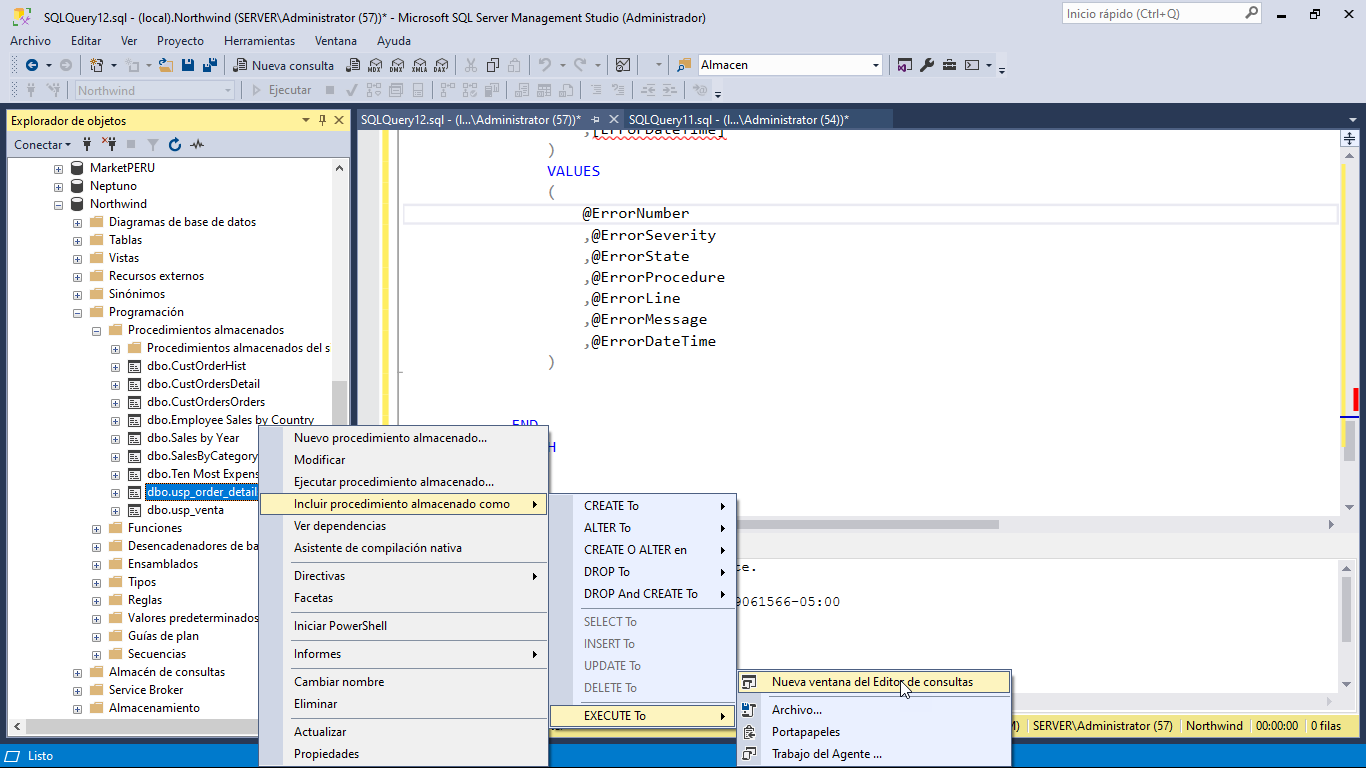

<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Error generado por el usuario en el precio del producto</font>**

</td>
</tr>
</table>



```
USE [Northwind]
GO
-- TRUNCATE TABLE [dbo].[tbl_error_usp]

DECLARE @RC int
DECLARE @OrderID int=10248
DECLARE @ProductID int=11
DECLARE @UnitPrice money=1
DECLARE @Quantity smallint=100
DECLARE @Discount real = 0.5

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID

EXECUTE @RC = [dbo].[usp_order_details_insert]
   @OrderID
  ,@ProductID
  ,@UnitPrice
  ,@Quantity
  ,@Discount;

SELECT @RC AS ERROR;

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID;

SELECT *
FROM Products
WHERE ProductID = @ProductID;




```



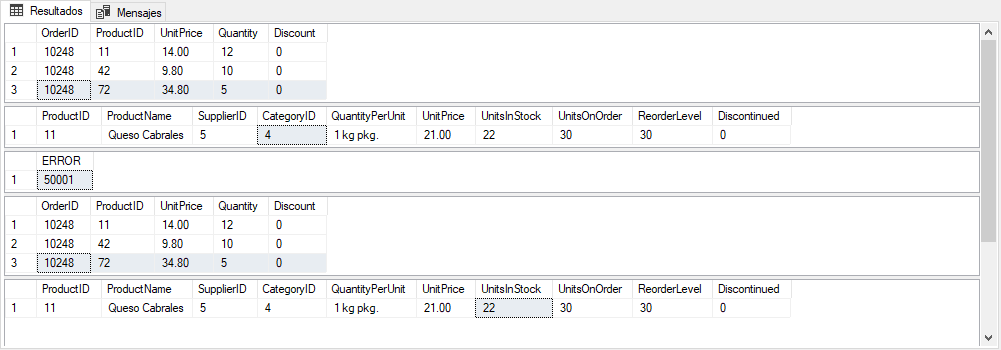

<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Error por Stock</font>**

</td>
</tr>
</table>





```
USE [Northwind]
GO
-- TRUNCATE TABLE [dbo].[tbl_error_usp]

DECLARE @RC int
DECLARE @OrderID int=10248
DECLARE @ProductID int=11
DECLARE @UnitPrice money=50
DECLARE @Quantity smallint=100
DECLARE @Discount real = 0.5

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID

EXECUTE @RC = [dbo].[usp_order_details_insert]
   @OrderID
  ,@ProductID
  ,@UnitPrice
  ,@Quantity
  ,@Discount;

SELECT @RC AS ERROR;

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID;

SELECT *
FROM Products
WHERE ProductID = @ProductID;
```



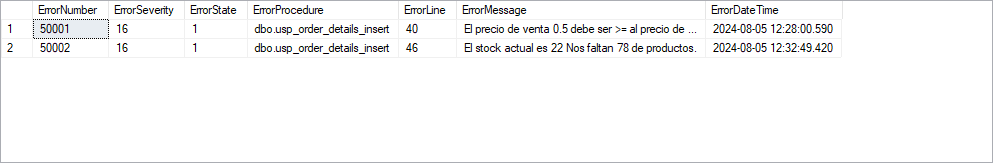

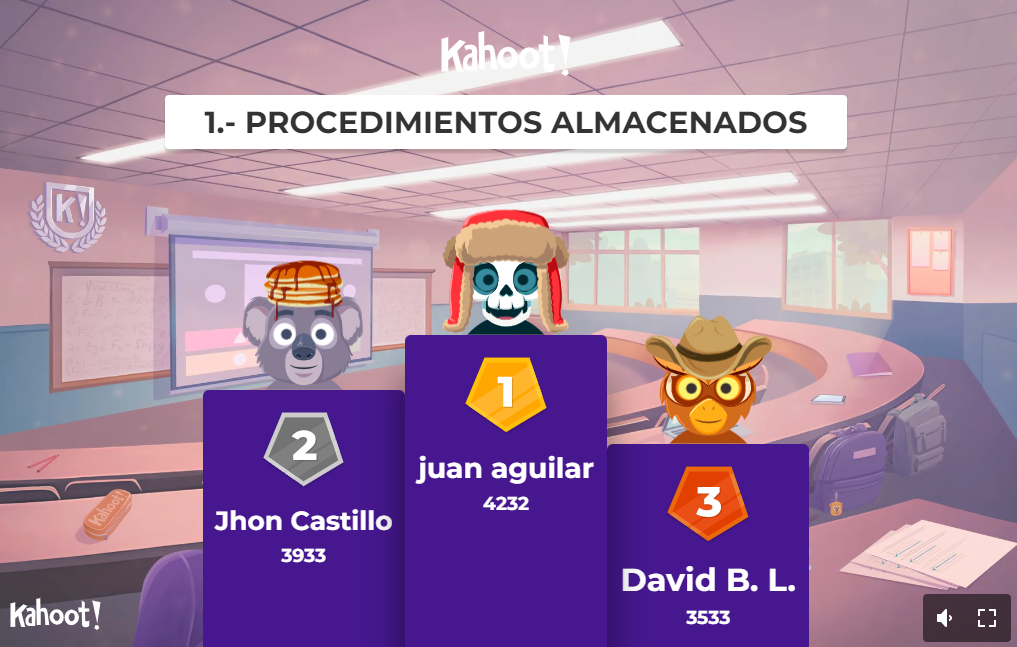# **BREAK: 12:36-12:50**

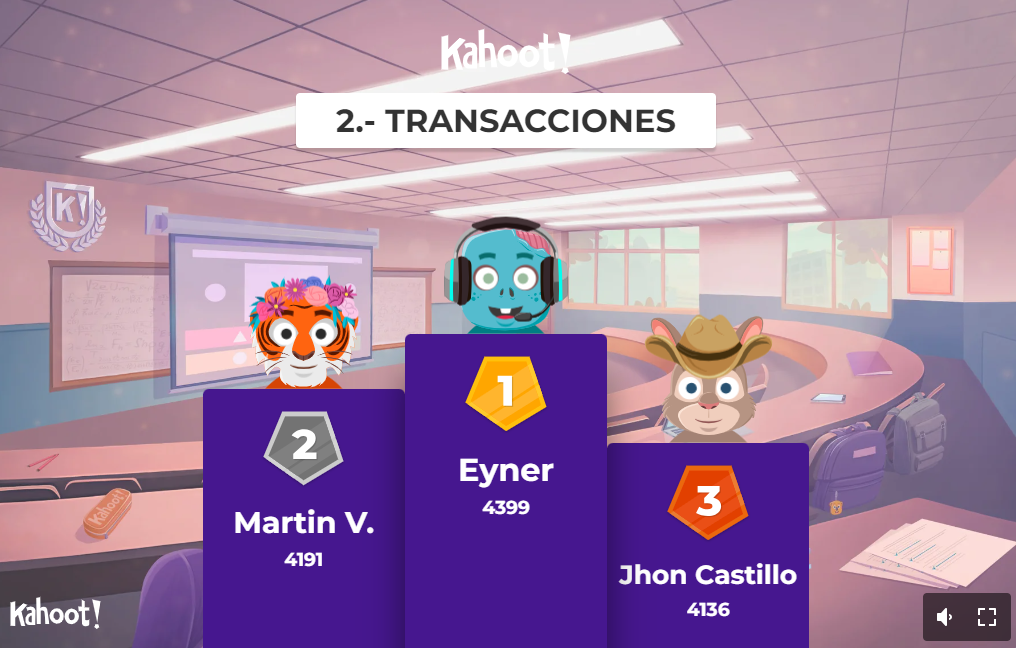

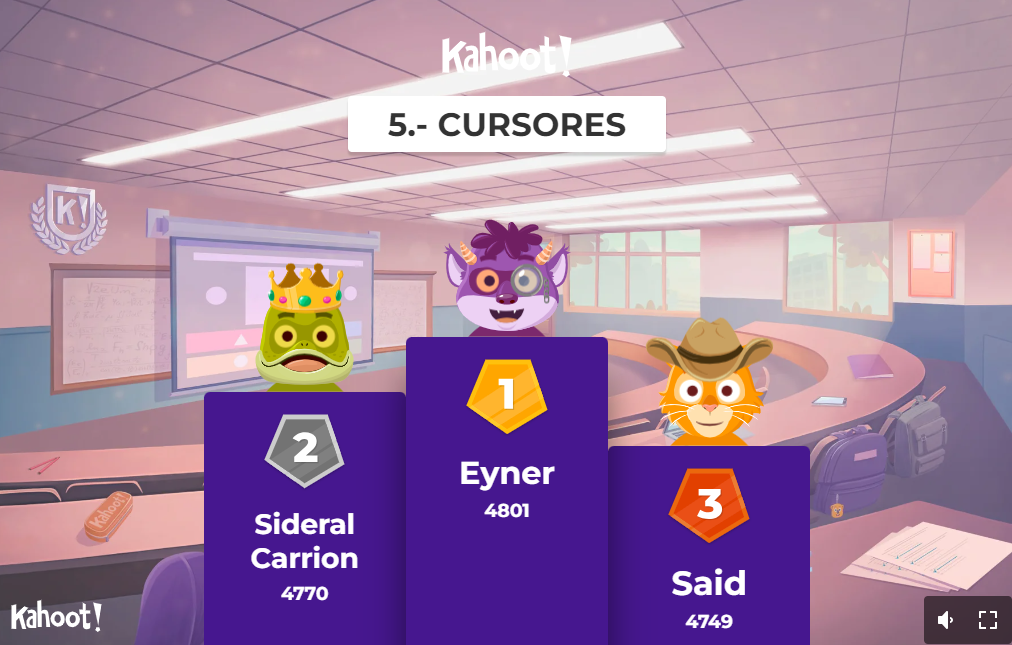



```
USE [Northwind]
GO
-- TRUNCATE TABLE [dbo].[tbl_error_usp]

DECLARE @RC int
DECLARE @OrderID int=10248
DECLARE @ProductID int=11
DECLARE @UnitPrice money=50
DECLARE @Quantity smallint=2
DECLARE @Discount real = 0.5

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID

EXECUTE @RC = [dbo].[usp_order_details_insert]
   @OrderID
  ,@ProductID
  ,@UnitPrice
  ,@Quantity
  ,@Discount;

SELECT @RC AS ERROR;

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID;

SELECT *
FROM Products
WHERE ProductID = @ProductID;
```



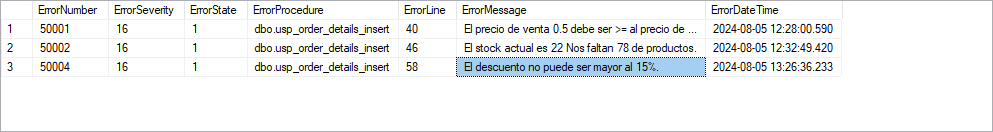



```
USE [Northwind]
GO
-- TRUNCATE TABLE [dbo].[tbl_error_usp]

DECLARE @RC int
DECLARE @OrderID int=10248
DECLARE @ProductID int=11
DECLARE @UnitPrice money=50
DECLARE @Quantity smallint=2
DECLARE @Discount real = 0.1

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID

EXECUTE @RC = [dbo].[usp_order_details_insert]
   @OrderID
  ,@ProductID
  ,@UnitPrice
  ,@Quantity
  ,@Discount;

SELECT @RC AS ERROR;

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID;

SELECT *
FROM Products
WHERE ProductID = @ProductID;




```



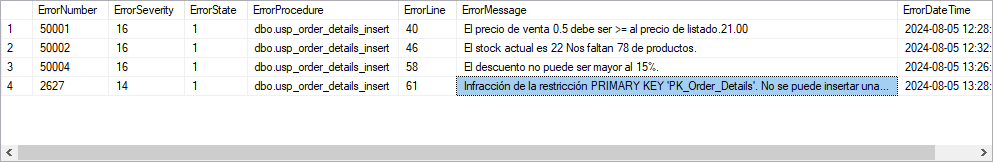



```
USE [Northwind]
GO
-- TRUNCATE TABLE [dbo].[tbl_error_usp]

DECLARE @RC int
DECLARE @OrderID int=10248
DECLARE @ProductID int=1
DECLARE @UnitPrice money=20
DECLARE @Quantity smallint=9
DECLARE @Discount real = 0.1

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID

EXECUTE @RC = [dbo].[usp_order_details_insert]
   @OrderID
  ,@ProductID
  ,@UnitPrice
  ,@Quantity
  ,@Discount;

SELECT @RC AS ERROR;

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID;

SELECT *
FROM Products
WHERE ProductID = @ProductID;




```



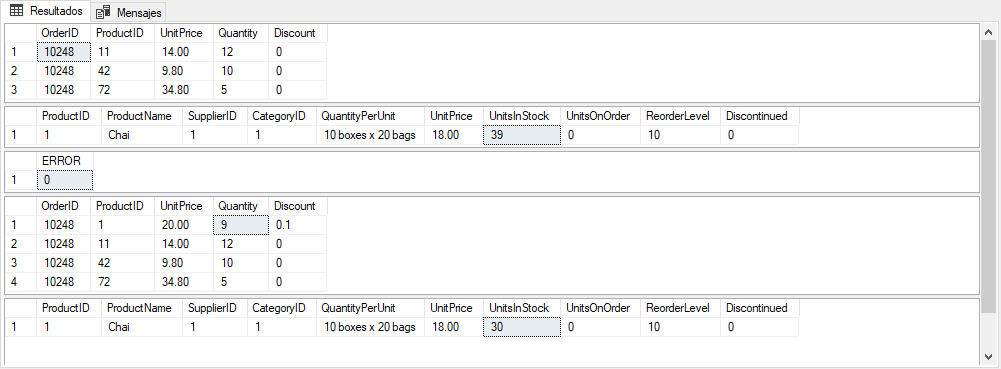

<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Ejercicio 1</font>**

</td>
</tr>
</table>



```
/*
1.	Escribir un programa que calcule el factorial de N.
N! = 1 x 2 x 3 x 4 x 5 x … x (N-1) x N

*/
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_factorial'
)
DROP PROCEDURE usp_factorial
GO
CREATE PROCEDURE usp_factorial
(
	@n	INT = 0,
	@f	INT OUTPUT
)
AS
BEGIN
	DECLARE @cnt INT = 1

	SET @f = 1

	WHILE @cnt <= @n
	BEGIN
		SET @f *= @cnt;
		SET @cnt += 1
	END
	RETURN 0
END
GO

DECLARE @RC int
DECLARE @n int=0
DECLARE @f int=1
DECLARE @str VARCHAR(8000) = ''

WHILE @n <= 5
BEGIN
	EXECUTE @RC = [dbo].[usp_factorial]  @n, @f OUTPUT
	SET @str += CONCAT(@n, '!= ', @f, CHAR(10))
	SET @n += 1
END
PRINT @str
GO
```





```
/*
1.    Escribir un programa que calcule el factorial de N.
N! = 1 x 2 x 3 x 4 x 5 x … x (N-1) x N

*/
USE Northwind
GO
IF EXISTS
(
    SELECT name
    FROM sys.procedures
    WHERE name = 'usp_factorial'
)
DROP PROCEDURE usp_factorial
GO
CREATE PROCEDURE usp_factorial
(
    @n    INT = 0,
    @f    INT = 1 OUTPUT
)
AS
BEGIN
    DECLARE @cnt INT = 1;

    WHILE @cnt <= @n
    BEGIN
        SET @f *= @cnt;
        SET @cnt += 1;
    END
    RETURN 0
END
GO

DECLARE @RC int;
DECLARE @n int=0;
DECLARE @f int;
DECLARE @str VARCHAR(8000) = ''

WHILE @n <= 5
BEGIN
	SET @f = 1;
    EXECUTE @RC = [dbo].[usp_factorial]  @n, @f OUTPUT
    SET @str += CONCAT(@n, '!= ', @f, CHAR(10))
    SET @n += 1
END
PRINT @str
GO
```



<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Ejercicio 2</font>**

</td>
</tr>
</table>



```
/*
2.	Escribir un procedimiento almacenado que encuentre el término en
la posición N-ésima de la sucesión de Fibonacci:

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, …
*/

USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_fibonacci_pos_n'
)
DROP PROCEDURE usp_fibonacci_pos_n
GO
CREATE PROCEDURE usp_fibonacci_pos_n
(
	@n INT,
	@sal INT OUTPUT
)
AS
BEGIN
	DECLARE @a INT = 0, @b INT = 1, @c INT, @cnt INT = 1;
	WHILE @cnt < @n
	BEGIN
		-- PRINT CONCAT(@cnt, ': ', @a);

		SET @c = @a + @b;
		SET @a = @b;
		SET @b = @c;

		SET @cnt += 1;
	END
	SET @sal = @a;
END
GO

DECLARE @RC int
DECLARE @n int = 6
DECLARE @sal int

EXECUTE @RC = [dbo].[usp_fibonacci_pos_n]
   @n
  ,@sal OUTPUT

SELECT @sal AS [Término N-ésimo de la serie de Fibonacci]

GO
```





```
/*
2.	Escribir un procedimiento almacenado que encuentre el término en
la posición N-ésima de la sucesión de Fibonacci:

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, …
*/

USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_fibonacci_pos_n'
)
DROP PROCEDURE usp_fibonacci_pos_n
GO
CREATE PROCEDURE usp_fibonacci_pos_n
(
	@n INT,
	@c INT OUTPUT,
	@str VARCHAR(8000) OUTPUT
)
AS
BEGIN
	DECLARE @a INT = 0, @b INT = 1, @cnt INT = 1;

	SET @str = 'Serie de Fibonacci: ';

	WHILE @cnt <= @n
	BEGIN
		SET @str += CONCAT(@a, ', ');

		SET @c = @a + @b;
		SET @a = @b;
		SET @b = @c;

		SET @cnt += 1;
	END

	SET @str = @str + CHAR(10);
	SET @c = @c-@a;
	SET @str += CONCAT('El termino de la posición ', @n, ' de la serie de fibonacci es ', @c);

END
GO

DECLARE @RC int
DECLARE @n int = 6;
DECLARE @c int;
DECLARE @s VARCHAR(8000);

EXECUTE @RC = [dbo].[usp_fibonacci_pos_n]
   @n
  ,@c OUTPUT
  ,@s OUTPUT

SELECT @s AS [Serie]
SELECT @c AS [Término N-ésimo de la serie de Fibonacci]

GO
```





```
/*
2.	Escribir un procedimiento almacenado que encuentre el término en
la posición N-ésima de la sucesión de Fibonacci:

Probar para 50

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, …
*/

USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_fibonacci_pos_n'
)
DROP PROCEDURE usp_fibonacci_pos_n
GO
CREATE PROCEDURE usp_fibonacci_pos_n
(
	@n INT,
	@c BIGINT OUTPUT,
	@str VARCHAR(8000) OUTPUT
)
AS
BEGIN
	PRINT 'OK1'
	DECLARE @a BIGINT = 0, @b BIGINT = 1, @cnt INT = 1;
	PRINT 'OK2'

	SET @str = 'Serie de Fibonacci: ';

	WHILE @cnt <= @n
	BEGIN
		SET @str += CONCAT(@a, ', ');

		SET @c = @a + @b;
		SET @a = @b;
		SET @b = @c;

		SET @cnt += 1;
	END

	SET @str = @str + CHAR(10);
	SET @c = @c-@a;
	SET @str += CONCAT('El término de la posición ', @n, ' de la serie de fibonacci es ', @c);

END
GO

DECLARE @RC int
DECLARE @n int = 50;
DECLARE @c BIGINT;
DECLARE @s VARCHAR(8000);

EXECUTE @RC = [dbo].[usp_fibonacci_pos_n]
   @n
  ,@c OUTPUT
  ,@s OUTPUT

SELECT @s AS [Serie]
SELECT @c AS [Término N-ésimo de la serie de Fibonacci]

GO
```



<table width='99%'>
<tr>
<td bgcolor='#E5D741'>

##### **<font color="#000000"> ◉ CORRECCIÓN ALUMNO</font>**

</td>
</tr>
</table>



```
USE Northwind;
GO

DROP PROCEDURE IF EXISTS usp_sucecion_fibonacci;
GO

CREATE PROCEDURE usp_sucecion_fibonacci
(
	@sucesion int
)
AS
BEGIN
	DECLARE @x bigint = 0
	DECLARE @y bigint = 1
	DECLARE @n int = 1
	DECLARE @r bigint

	WHILE @n <= @sucesion
	BEGIN
		SET @r = @x + @y;
		SET @x = @y;
		SET @y = @r;
		SET @n +=1;
		PRINT @r-@x;
	END

	PRINT CONCAT('El  Fibonacci ', @sucesion, ' es igual a ', @r-@x)

	RETURN 0
END
GO
```



<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Procedimiento almacenado transaccional de modificación</font>**

</td>
</tr>
</table>



```
USE [Northwind]
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_order_details_update'
)
DROP PROCEDURE [dbo].[usp_order_details_update]
GO
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
CREATE PROCEDURE [dbo].[usp_order_details_update]
(
	@OrderID		int,
	@ProductID		int,
	@UnitPrice		money,
	@Quantity		smallint,
	@Discount		real
)
AS
BEGIN

	DECLARE @ErrorNumber		int;
	DECLARE @ErrorSeverity		int;
	DECLARE @ErrorState			int;
	DECLARE @ErrorProcedure		nvarchar(128);
	DECLARE @ErrorLine			int;
	DECLARE @ErrorMessage		nvarchar(4000);
	DECLARE @ErrorDateTime		datetime;

	DECLARE @Precio				money;
	DECLARE @UnitsInStock		smallint;
	DECLARE @Discontinued		bit;

	DECLARE @strMsg				VARCHAR(8000);

	DECLARE @CantidadAnt		smallint;


	BEGIN TRANSACTION
		BEGIN TRY
			SELECT
				@CantidadAnt = [Quantity]
			FROM [dbo].[Order Details]
			WHERE
					[OrderID] = @OrderID
				AND
					[ProductID] = @ProductID

			SELECT
				@Precio = [UnitPrice]
				,@UnitsInStock = [UnitsInStock]
				,@Discontinued = [Discontinued]
			FROM [dbo].[Products]
			WHERE [ProductID] = @ProductID;

			IF @UnitPrice*(1-@Discount) <  @Precio
			BEGIN
				SET @strMsg = CONCAT('El precio de venta ', @UnitPrice*(1-@Discount), ' debe ser >= al precio de listado.', @Precio);
				THROW 50001, @strMsg, 1;
			END

			IF @UnitsInStock + @CantidadAnt < @Quantity
			BEGIN
				SET @strMsg = CONCAT('El stock actual es ', @UnitsInStock + @CantidadAnt, ' Nos faltan ', @Quantity - (@UnitsInStock + @CantidadAnt), ' productos.');
				THROW 50002, @strMsg, 1;
			END

			IF @Discontinued = 1
			BEGIN
				SET @strMsg = 'El producto se encuentra descontinuado.';
				THROW 50003, @strMsg, 1;
			END

			IF @Discount > 0.15
			BEGIN
				SET @strMsg = 'El descuento no puede ser mayor al 15%%.';
				THROW 50004, @strMsg, 1;
			END

			UPDATE [dbo].[Order Details]
			SET
				[UnitPrice] = @UnitPrice
				,[Quantity] = @Quantity
				,[Discount] = @Discount
			WHERE
					[OrderID] = @OrderID
				AND
					[ProductID] = @ProductID


			UPDATE [dbo].[Products]
			SET [UnitsInStock] = [UnitsInStock] + @CantidadAnt - @Quantity
			WHERE ProductID = @ProductID;

			COMMIT TRANSACTION
		END TRY
		BEGIN CATCH
			IF @@TRANCOUNT = 1
			BEGIN
				SELECT
					@ErrorNumber = ERROR_NUMBER(),
					@ErrorSeverity = ERROR_SEVERITY(),
					@ErrorState = ERROR_STATE(),
					@ErrorProcedure = ERROR_PROCEDURE(),
					@ErrorLine = ERROR_LINE(),
					@ErrorMessage = ERROR_MESSAGE(),
					@ErrorDateTime = GETDATE()

				ROLLBACK TRANSACTION

				INSERT INTO [dbo].[tbl_error_usp]
				(
					[ErrorNumber]
					,[ErrorSeverity]
					,[ErrorState]
					,[ErrorProcedure]
					,[ErrorLine]
					,[ErrorMessage]
					,[ErrorDateTime]
				)
				VALUES
				(
					@ErrorNumber
					,@ErrorSeverity
					,@ErrorState
					,@ErrorProcedure
					,@ErrorLine
					,@ErrorMessage
					,@ErrorDateTime
				)
				RETURN @ErrorNumber
			END
		END CATCH
	RETURN 0
END

```





```
USE [Northwind]
GO
TRUNCATE TABLE [dbo].[tbl_error_usp]
GO

DECLARE @RC int
DECLARE @OrderID int = 10248
DECLARE @ProductID int = 1
DECLARE @UnitPrice money = 0
DECLARE @Quantity smallint = 1000
DECLARE @Discount real = 0.5

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID

-- TODO: Establezca los valores de los parámetros aquí.

EXECUTE @RC = [dbo].[usp_order_details_update]
   @OrderID
  ,@ProductID
  ,@UnitPrice
  ,@Quantity
  ,@Discount



SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID
```



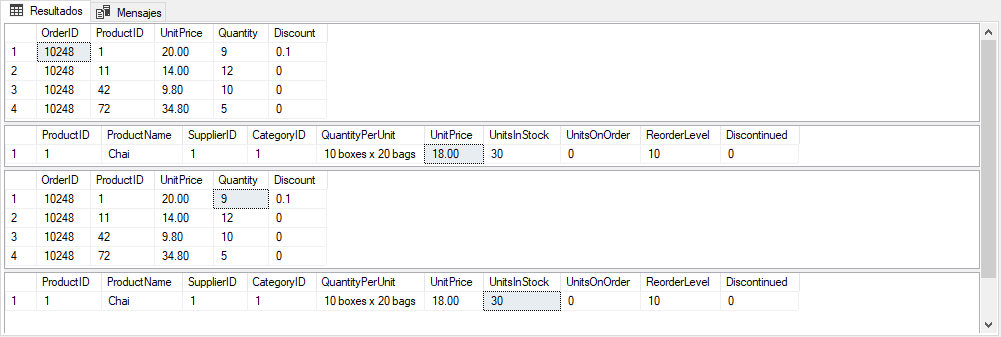

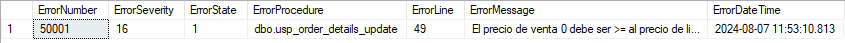



```
USE [Northwind]
GO
--TRUNCATE TABLE [dbo].[tbl_error_usp]
GO

DECLARE @RC int
DECLARE @OrderID int = 10248
DECLARE @ProductID int = 1
DECLARE @UnitPrice money = 20
DECLARE @Quantity smallint = 39
DECLARE @Discount real = 0.1

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID

-- TODO: Establezca los valores de los parámetros aquí.

EXECUTE @RC = [dbo].[usp_order_details_update]
   @OrderID
  ,@ProductID
  ,@UnitPrice
  ,@Quantity
  ,@Discount



SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID
```





```
USE [Northwind]
GO
--TRUNCATE TABLE [dbo].[tbl_error_usp]
GO

DECLARE @RC int
DECLARE @OrderID int = 10248
DECLARE @ProductID int = 1
DECLARE @UnitPrice money = 20
DECLARE @Quantity smallint = 10
DECLARE @Discount real = 0.1

SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID

-- TODO: Establezca los valores de los parámetros aquí.

EXECUTE @RC = [dbo].[usp_order_details_update]
   @OrderID
  ,@ProductID
  ,@UnitPrice
  ,@Quantity
  ,@Discount



SELECT *
FROM [Order Details]
WHERE OrderID = @OrderID

SELECT *
FROM Products
WHERE ProductID = @ProductID
```

